In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
#from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

%matplotlib inline

# 1. Create dataset for binary classification task (binary crossentropy), where *k-NN* perfoms **worse** than *logistic regression*

In [0]:
X1 = list(range(1, 1000, 50)) + list(range(10, 1000, 50))
X2 = list(range(1, 1000, 50)) + list(range(1, 1000, 50))
y = np.array([0] * int(len(X1)/2) + [1] * int(len(X1)/2))

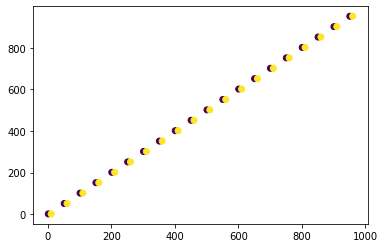

In [0]:
plt.scatter(X1, X2, c=y)

In [0]:
data_dict = {'X1': X1, 'X2': X2}
df = pd.DataFrame(data_dict)

In [0]:
X = [] 
  
for idx, rows in df.iterrows(): 
    my_list = [rows.X1, rows.X2]       
    X.append(my_list) 

In [0]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)
print(f'K-NN: {accuracy_score(pred1, y_test)}')
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)
print(f'Logistic regression: {accuracy_score(pred2, y_test)}')

K-NN: 0.3
Logistic regression: 1.0


1.   K-NN справляется хуже, поскольку в выборке много разноклассовых объектов, расположенных близко друг к другу.
2.   Логистическая регрессия справляется лучше, поскольку выборка линейно разделима.


# 2. Create dataset for binary classification task (binary crossentropy), where *logistic regression* perfoms **worse** than *k-NN*

In [0]:
data = make_circles(n_samples=100, noise=0.05)
X = data[0]  
y = data[1]  

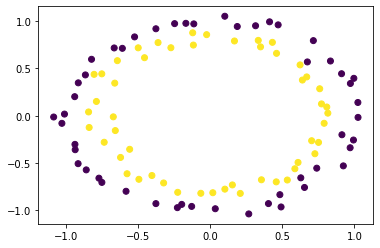

In [0]:
plt.scatter(X[:,0], X[:,1], c=y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()

In [0]:
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)
print(f'K-NN: {accuracy_score(pred1, y_test)}')
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)
print(f'Logistic regression: {accuracy_score(pred2, y_test)}')

K-NN: 0.88
Logistic regression: 0.48


1. Логистическая регрессия справляется хуже, поскольку выборка линейно неразделима.
2. K-NN справляется лучше, поскольку объекты одного класса сгруппированы.








# 3. Create dataset for binary classification task (binary crossentropy), where *k-NN with cosine distance* perfoms **better** than *k-NN with euclidean distance*

In [0]:
X1 = list(range(1, 1000, 25)) + list(range(10, 1000, 25))
X2 = list(range(1, 1000, 25)) + list(range(1, 1000, 25))
y = np.array([0] * int(len(X1)/2) + [1] * int(len(X1)/2))

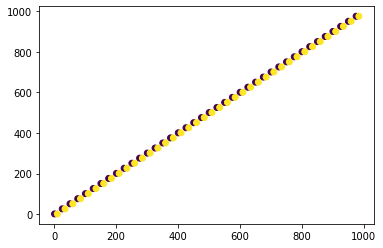

In [0]:
plt.scatter(X1, X2, c=y)

In [0]:
data_dict = {'X1': X1, 'X2': X2}
df = pd.DataFrame(data_dict)

In [0]:
X = [] 
  
for idx, rows in df.iterrows(): 
    my_list = [rows.X1, rows.X2]       
    X.append(my_list) 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
clf1 = KNeighborsClassifier(metric="cosine")
clf2 = KNeighborsClassifier(metric='euclidean')

In [0]:
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)
print(f'Cosine: {accuracy_score(pred1, y_test)}')
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)
print(f'Euclidean: {accuracy_score(pred2, y_test)}')

Cosine: 1.0
Euclidean: 0.2


1. K-NN с cosine distance справляется лучше, поскольку косинусное расстояние между объктами одного класса меньше, чем между объектами разных классов.
2. K-NN с euclidean distance справляется хуже, поскольку расстояние между объектами одного класса больше, чем расстояние между объктами разных классов.

